<font size="+3"><strong>1 Housing in Mexico 🇲🇽</strong></font>

<font size="+1"><strong>1.5 Housing in Brazil 🇧🇷</strong></font>

This notebook resumes the most important things learned in the WorldQuant course 1 - "Housing in Mexico". It uses the courses' project "Housing in Brazil" since it covers the main ideas learned.


The project analyzes a dataset of homes for sale in Brazil to determine regional differences in the real estate market and examine the relationship between home size and price in southern Brazil.


Topics learned in this project:

- How to organize information using basic Python data structures
- How to import data from CSV files and clean it using <code>pandas</code> library
- How to create data visualizations like scatter and box plots
- How to examine the relationship between two variables using correlation

Imports necessary libraries:

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px

In [20]:
df1 = pd.read_csv("data/brasil-real-estate-1.csv", sep=";") # reads csv data to dataframe
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85"
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37"
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45"
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20"
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71"


In [23]:
df1.info() # provides information about columns content and data types

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            11551 non-null  object 
 1   place_with_parent_names  11551 non-null  object 
 2   region                   11551 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  11551 non-null  float64
 5   price_usd                11551 non-null  object 
dtypes: float64(1), object(5)
memory usage: 631.7+ KB


In [ ]:
df1.dropna(inplace=True) # removes rows with NaN values
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   property_type            11551 non-null  object 
 1   place_with_parent_names  11551 non-null  object 
 2   region                   11551 non-null  object 
 3   lat-lon                  11551 non-null  object 
 4   area_m2                  11551 non-null  float64
 5   price_usd                11551 non-null  object 
dtypes: float64(1), object(5)
memory usage: 631.7+ KB


Separates the column "lat-lon" into 2 different columns and atributes them the float type:

In [24]:
df1[["lat", "lon"]] = df1["lat-lon"].str.split(",", expand=True).astype(float)

In [25]:
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85",-9.644305,-35.708814
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37",-9.643093,-35.704840
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45",-9.622703,-35.729795
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20",-9.622837,-35.719556
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71",-9.654955,-35.700227


Creates the column "state" from the state name which appears in "place_with_parent_names" after Brasil:

In [26]:
df1["state"] = df1["place_with_parent_names"].str.split("|", expand=True)[2]

In [27]:
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,"$187,230.85",-9.644305,-35.708814,Alagoas
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,"$81,133.37",-9.643093,-35.704840,Alagoas
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,"$154,465.45",-9.622703,-35.729795,Alagoas
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,"$146,013.20",-9.622837,-35.719556,Alagoas
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,"$101,416.71",-9.654955,-35.700227,Alagoas


Transforms the "price_usd" column so that all values are floating-point numbers instead of strings:

In [29]:
df1["price_usd"] = (
    df1["price_usd"]
    .str.replace("$", "") # removes "$"
    .str.replace(",", "") # removes ","
    .astype(float) # changes data type to float
)

In [30]:
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110.0,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65.0,81133.37,-9.643093,-35.704840,Alagoas
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211.0,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99.0,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55.0,101416.71,-9.654955,-35.700227,Alagoas


Drops columns "lat-lon" and "place_with_parent_names" since aren't necessary no more:

In [47]:
df1 = df1.drop(columns=["lat-lon", "place_with_parent_names"])

Now we're going to import and clean data from "brasil-real-estate-2.csv"

In [48]:
df1.head()

,property_type,region,area_m2,price_usd,lat,lon,state
0,apartment,Northeast,110.0,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,Northeast,65.0,81133.37,-9.643093,-35.704840,Alagoas
2,house,Northeast,211.0,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,Northeast,99.0,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,Northeast,55.0,101416.71,-9.654955,-35.700227,Alagoas


In [35]:
df2 = pd.read_csv("data/brasil-real-estate-2.csv", sep=";") # read file

In [36]:
df2.head()

,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  12833 non-null  object 
 1   state          12833 non-null  object 
 2   region         12833 non-null  object 
 3   lat            12833 non-null  float64
 4   lon            12833 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_brl      12833 non-null  float64
dtypes: float64(4), object(3)
memory usage: 701.9+ KB


In [38]:
df2["price_usd"] = df2["price_brl"] / 3.19 # creates "price_usd" from "price_brl"

In [39]:
df2.head()

,property_type,state,region,lat,lon,area_m2,price_brl,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98,129850.463950
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53,265958.786834
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28,93867.799373
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53,265958.786834
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36,145495.097179


In [41]:
df2.dropna(inplace=True) # removes columns with NaN values

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11293 entries, 0 to 12832
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  11293 non-null  object 
 1   state          11293 non-null  object 
 2   region         11293 non-null  object 
 3   lat            11293 non-null  float64
 4   lon            11293 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_brl      11293 non-null  float64
 7   price_usd      11293 non-null  float64
dtypes: float64(5), object(3)
memory usage: 794.0+ KB


In [43]:
df2 = df2.drop(columns=["price_brl"]) # drops "price_brl" column

In [44]:
df2.head()

,property_type,state,region,lat,lon,area_m2,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.463950
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.786834
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.799373
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.786834
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.097179


Combining df1 and df2 into a single DataFrame:

In [49]:
df = pd.concat([df1, df2])
print("df shape:", df.shape)

df shape: (22844, 7)


### Exploratory Data Analysis (EDA)

EDA is done to get a feel of the data by summarizing its main characteristics using descriptive statistics and data visualization.

The following figure - a scatter map - shows us the location and regional entries for the different DataFrame entries (houses):

In [51]:
fig = px.scatter_mapbox(
    df,
    lat="lat",
    lon="lon",
    center={"lat": -14.2, "lon": -51.9}, # map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["price_usd"], # displays price when hovering mouse over house
)

fig.update_layout(mapbox_style="open-street-map")

fig.show()

/var/folders/5f/_hrbyw1j0db7vvwgd5_xmnt00000gn/T/ipykernel_36037/1523002208.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



The <code>.describe()</code> method creates a new DataFrame with the summary statistics for the gives columns:

In [53]:
summary_stats = df[["area_m2", "price_usd"]].describe()
summary_stats

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,194987.315480
std,47.742932,103617.682978
min,53.000000,74892.340000
25%,76.000000,113898.770000
50%,103.000000,165697.555000
75%,142.000000,246900.880878
max,252.000000,525659.717868


<div class="alert alert-info" role="alert">

While the global matplotlib method to create plots is <code>plt.plot(...)</code>, we will use the object-oriented (OOP) API. This means creating the plots using <code>fig, ax = plt.subplots()</code> and then calling plotting methods on the <code>ax</code> object, such as <code>ax.plot(...)</code>, <code>ax.hist(...)</code>, or <code>ax.scatter(...)</code>.

This approach is considered best practice and will be used consistently in this course.
</div>

Creates a histogram of the distribution of home prices:

Text(0.5, 1.0, 'Distribution of Home Prices')

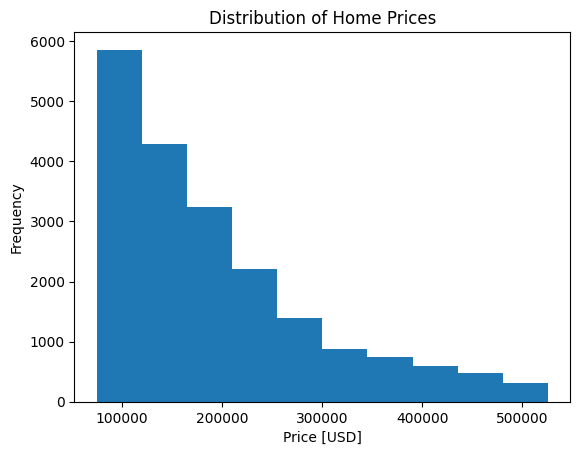

In [55]:
fig, ax = plt.subplots()

ax.hist(df["price_usd"][:20000]) # removes outliers

ax.set_xlabel("Price [USD]")
ax.set_ylabel("Frequency")

ax.set_title("Distribution of Home Prices")

A boxplot summarizes the distribution of a dataset. It provides information on:
- Median (line inside the box)
- First Quartile, Q1 (25% of data falls below this value)
- Third Quartile, Q3 (75% of data falls below this value)
- Outliers (represented as dots)

Creates a horizontal boxplot for the <code>"area_m2"</code> data

Text(0.5, 1.0, 'Distribution of Home Sizes')

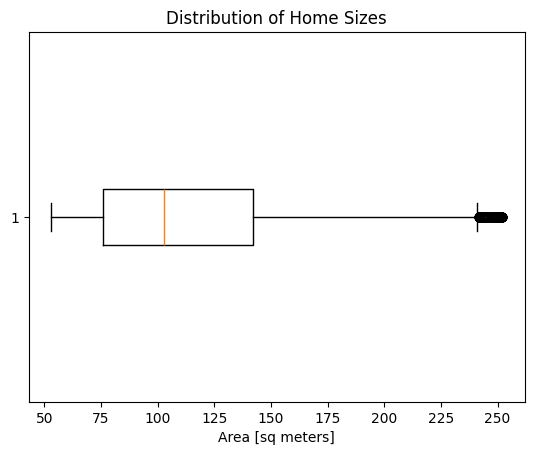

In [56]:
fix, ax = plt.subplots()

ax.boxplot(df["area_m2"], vert=False) # horizontal boxplot

ax.set_xlabel("Area [sq meters]")
ax.set_title("Distribution of Home Sizes")

Creates a Series that shows the mean home price in each region in Brazil:

In [ ]:
mean_price_by_region = (
    df["price_usd"]
    .groupby(df["region"]) # groups data by region
    .mean() # performs / calculates the mean value
    .sort_values() # sorts from smallest to largest value
)
mean_price_by_region

region
Central-West    178596.283663
North           181308.958207
Northeast       185422.985441
South           189012.345265
Southeast       208996.762778
Name: price_usd, dtype: float64

Creates a bar chart:

<Axes: title={'center': 'Mean Home Price by Region'}, xlabel='Region', ylabel='Mean Price [USD]'>

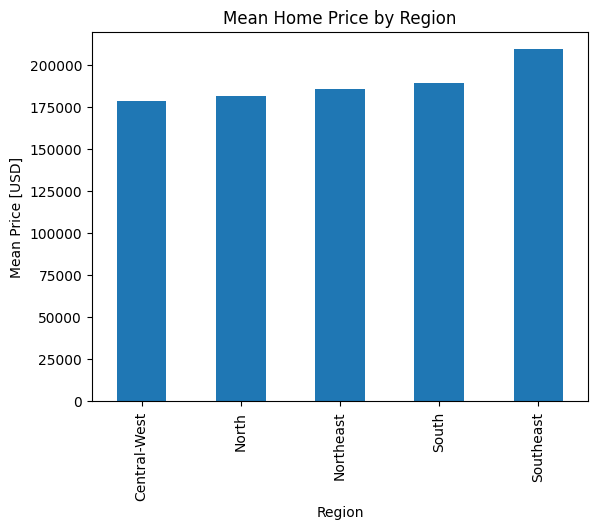

In [58]:
fig, ax = plt.subplots()

mean_price_by_region.plot(
    kind="bar",
    xlabel=("Region"),
    ylabel=("Mean Price [USD]"),
    title=("Mean Home Price by Region"),
    ax=ax
)

Now we're going to focus on the southern region of Brazil.

In [59]:
df_south = df[df["region"] == "South"]
df_south.head()

,property_type,region,area_m2,price_usd,lat,lon,state
9304,apartment,South,127.0,296448.85,-25.455704,-49.292918,Paraná
9305,apartment,South,104.0,219996.25,-25.455704,-49.292918,Paraná
9306,apartment,South,100.0,194210.50,-25.460236,-49.293812,Paraná
9307,apartment,South,77.0,149252.94,-25.460236,-49.293812,Paraná
9308,apartment,South,73.0,144167.75,-25.460236,-49.293812,Paraná


Counts the number of properties in each state in the southern region:

In [60]:
homes_by_state = df_south["state"].value_counts()
homes_by_state

state
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: count, dtype: int64

Creates a scatter plot showing price vs. area for the state in <code>df_south</code> that has the largest number of properties (Rio Grande do Sul):

Text(0.5, 1.0, 'Rio Grande do Sul: Price vs. Area')

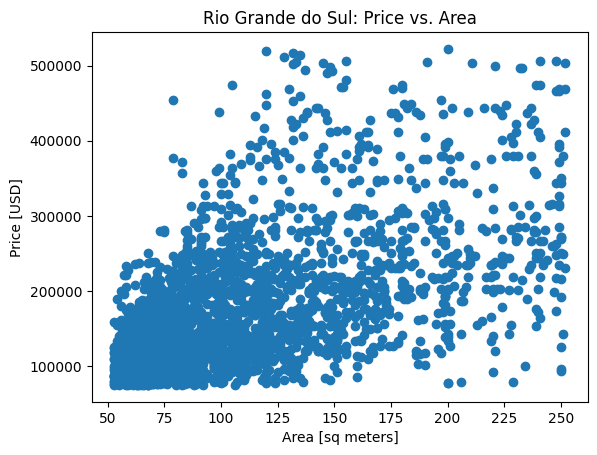

In [61]:
df_south_rgs = df_south[df_south["state"] == "Rio Grande do Sul"]

fig, ax = plt.subplots()

ax.scatter(x=df_south_rgs["area_m2"], y=df_south_rgs["price_usd"])

ax.set_xlabel("Area [sq meters]")
ax.set_ylabel("Price [USD]")
ax.set_title("Rio Grande do Sul: Price vs. Area")

Creates a dictionary where the keys are the names of the three states in the <code>"South"</code> region of Brazil, and their associated values are the correlation coefficient between <code>"area_m2"</code> and <code>"price_usd"</code> in that state.

In [63]:
df_south_sc = df_south[df_south["state"] == "Santa Catarina"]
df_south_pa = df_south[df_south["state"] == "Paraná"]

south_states_corr = {
    "Rio Grande do Sul": df_south_rgs["price_usd"].corr(df_south_rgs["area_m2"]),
    "Santa Catarina": df_south_sc["price_usd"].corr(df_south_sc["area_m2"]),
    "Paraná": df_south_pa["price_usd"].corr(df_south_pa["area_m2"]),
}

south_states_corr

{'Rio Grande do Sul': np.float64(0.5773267433717686),
 'Santa Catarina': np.float64(0.5068121776366781),
 'Paraná': np.float64(0.5436659935502657)}